In [2]:
!pip install matplotlib
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 456.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.6 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.6 MB 14.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 17.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.5/10.6 MB 20.8 MB/s eta 0:00:01
   --------

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split

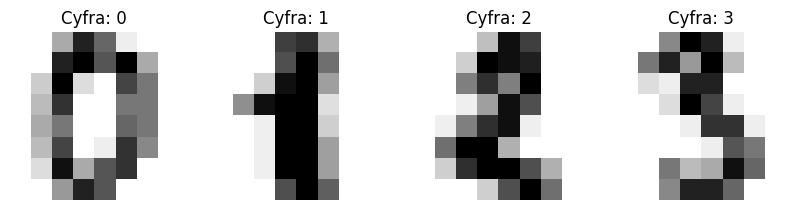

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Cyfra: %i" %label)
    

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

In [6]:
clf=svm.SVC(gamma=0.001)
X_train,X_test,y_train,y_test = train_test_split(
    data,digits.target,test_size=0.5,shuffle=False
)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

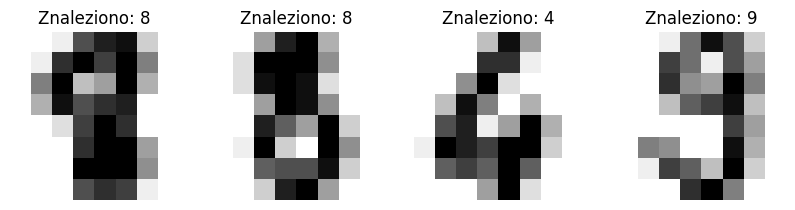

In [7]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Znaleziono: %i" %prediction)

In [8]:
print(f'Rapotklasyfikacyjny dla klasyfikatora clf: {clf}\n{metrics.classification_report(y_test,predicted)}\n')

Rapotklasyfikacyjny dla klasyfikatora clf: SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Macierz pomyłek:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


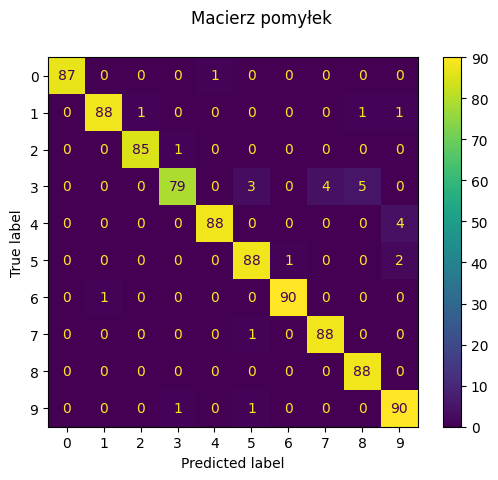

In [9]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")
print(f'Macierz pomyłek:\n{disp.confusion_matrix}')